## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('LoanStatus.csv')


In [19]:
# ამ ფუნქციით გამოგვაქს საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ.
def interpret_descriptive_stats(stats, col):
    interpretation = {
        'Mean': f"The average {col.lower()} is approximately {stats['mean']:.2f}.",
        'Standard Deviation': f"The standard deviation for {col.lower()} is around {stats['std']:.2f}, indicating the variability or spread of the data.",
        'Minimum': f"The minimum {col.lower()} is {stats['min']:.2f}.",
        '25th Percentile (Q1)': f"25% of the {col.lower()} are below {stats['25%']:.2f}.",
        'Median (50th Percentile)': f"Half of the {col.lower()} are below {stats['50%']:.2f}, while the other half are above this value.",
        '75th Percentile (Q3)': f"75% of the {col.lower()} are below {stats['75%']:.2f}.",
        'Maximum': f"The maximum {col.lower()} is {stats['max']:.2f}."
    }
    
    return interpretation

columns_of_interest = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in columns_of_interest:
    stats = df[col].describe()
    interpretation = interpret_descriptive_stats(stats, col)
    print(f"{col}:")
    for stat, text in interpretation.items():
        print(f"- {text}")
    print()

ApplicantIncome:
- The average applicantincome is approximately 5403.46.
- The standard deviation for applicantincome is around 6109.04, indicating the variability or spread of the data.
- The minimum applicantincome is 150.00.
- 25% of the applicantincome are below 2877.50.
- Half of the applicantincome are below 3812.50, while the other half are above this value.
- 75% of the applicantincome are below 5795.00.
- The maximum applicantincome is 81000.00.

LoanAmount:
- The average loanamount is approximately 146.41.
- The standard deviation for loanamount is around 85.59, indicating the variability or spread of the data.
- The minimum loanamount is 9.00.
- 25% of the loanamount are below 100.00.
- Half of the loanamount are below 128.00, while the other half are above this value.
- 75% of the loanamount are below 168.00.
- The maximum loanamount is 700.00.

Loan_Amount_Term:
- The average loan_amount_term is approximately 342.00.
- The standard deviation for loan_amount_term is around 

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [31]:
# "Y" და "N"  მნიშვნელობების რაოდენობა in Loan_Status
loan_status_counts = df['Loan_Status'].value_counts()

# სესხის მიღების ალბათობის გამოთვლა
total_records = len(df)
probability_loan = loan_status_counts['Y'] / total_records

print(f"Probability of getting a loan: {probability_loan:.2f}")
print("This probability represents the chance of an applicant getting a loan based on the historical data.")

Probability of getting a loan: 0.69
This probability represents the chance of an applicant getting a loan based on the historical data.


In [32]:
#  მონაცემთა ნაკრები რომლებსაც კარგი საკრედიტო ისტორია აქვთ ანუ Credit_History = 1
good_credit_df = df[df['Credit_History'] == 1]

# „Y“ მნიშვნელობების რაოდენობა Loan_Status-ში 
good_credit_loan_counts = good_credit_df['Loan_Status'].value_counts()

# ჩანაწერების რაოდენობა კარგი საკრედიტო ისტორიით
total_good_credit_records = len(good_credit_df)

# სესხის მიღების ალბათობა კარგი საკრედიტო ისტორიით
probability_good_credit_loan = good_credit_loan_counts['Y'] / total_good_credit_records

print(f"Probability of getting a loan with good credit history: {probability_good_credit_loan:.2f}")
print("This probability represents the chance of an applicant getting a loan given they have a good credit history.")


Probability of getting a loan with good credit history: 0.80
This probability represents the chance of an applicant getting a loan given they have a good credit history.


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

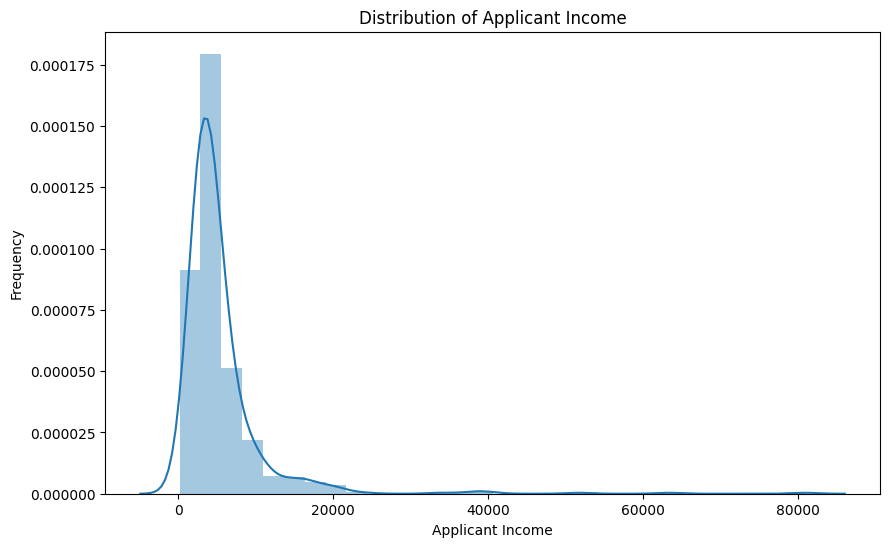

In [40]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.distplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

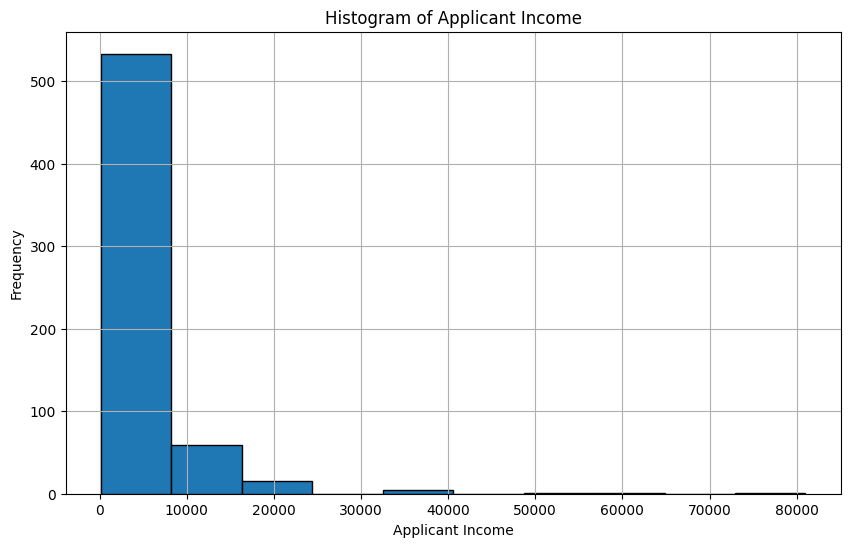

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['ApplicantIncome'], bins=10, edgecolor='black')
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [ ]:
from scipy.stats import norm

In [41]:
mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

cumulative_prob = norm.cdf(2000, mean_income, std_dev_income)

percentage_less_than_2000 = cumulative_prob * 100

print(f"Percentage of customers with income less than 2,000 euros per month: {percentage_less_than_2000:.2f}%")
print("This percentage represents the proportion of customers whose monthly income is below 2,000 euros, based on the normal distribution of ApplicantIncome.")

Percentage of customers with income less than 2,000 euros per month: 28.87%
This percentage represents the proportion of customers whose monthly income is below 2,000 euros, based on the normal distribution of ApplicantIncome.


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

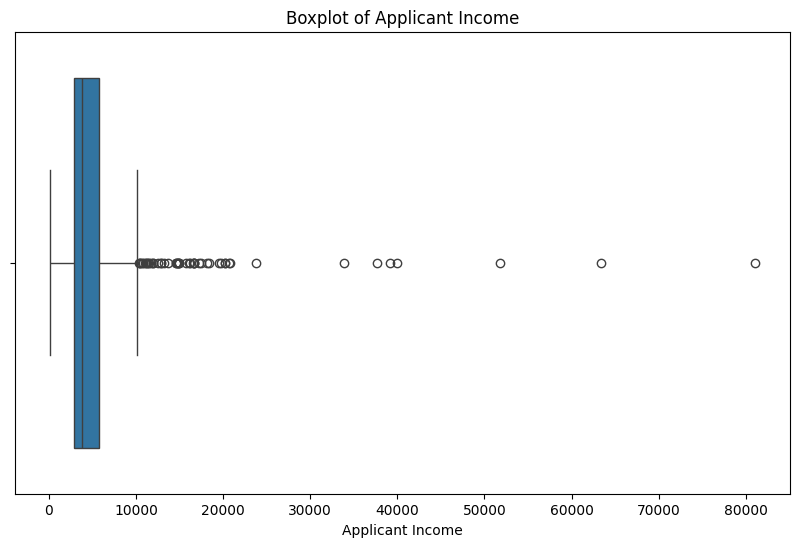

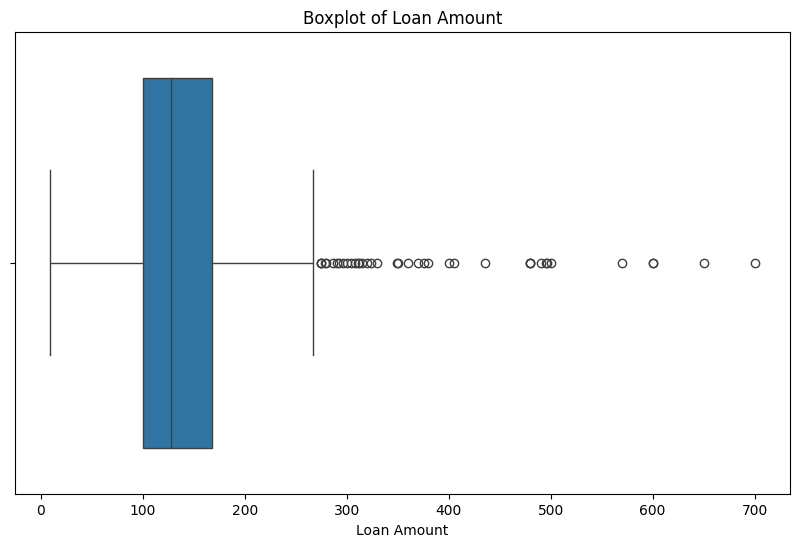

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.xlabel('Applicant Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['LoanAmount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [44]:
from scipy.stats import ttest_1samp,ttest_ind

In [46]:
specific_value = 5000

t_statistic, p_value = ttest_1samp(df['ApplicantIncome'].dropna(), specific_value)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average ApplicantIncome is not equal to 5000 euros.")
else:
    print("Fail to reject the null hypothesis: The average ApplicantIncome is equal to 5000 euros.")

t-statistic: 1.6364804093914873
p-value: 0.10225234862970933
Fail to reject the null hypothesis: The average ApplicantIncome is equal to 5000 euros.


In [47]:
group1 = df[df['Married'] == 'Yes']['ApplicantIncome'].dropna()
group2 = df[df['Married'] == 'No']['ApplicantIncome'].dropna()

t_statistic, p_value = ttest_ind(group1, group2)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ApplicantIncome between Married and Not Married groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ApplicantIncome between Married and Not Married groups.")

t-statistic: 1.2684334118526472
p-value: 0.20512786651887407
Fail to reject the null hypothesis: There is no significant difference in ApplicantIncome between Married and Not Married groups.
